In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc

In [23]:
#reading in the data and taking a look at the columns and the data types
cvd_data = pd.read_csv('https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv')
cvd_data.head()
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


**Binary Classifier Model Using Logisitic Regression**

In [24]:
#splitting the data
x = cvd_data.iloc[:,1:17]
y = cvd_data[['cvd_4types']]
y
x_train, x_test, y_train,y_test = train_test_split(x,y,random_state=3,test_size=.30, stratify=y)
x_train

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
2311,60,1,2,1,93.98,32.0,90.17,81.8,2.00,0,0,0,3,4,4,1
2669,65,1,2,1,115.00,37.0,112.00,81.8,0.00,0,0,0,2,2,4,3
1927,58,1,2,1,113.00,40.0,115.00,90.3,2.20,0,0,0,2,2,6,4
2586,72,1,1,1,94.00,41.0,93.00,82.2,23.00,0,0,0,2,2,4,4
2209,55,1,2,1,107.95,43.5,106.68,87.8,18.00,0,0,0,3,2,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,69,3,4,1,97.00,37.0,96.00,82.3,0.00,0,1,1,3,2,5,4
156,57,1,2,1,109.00,47.5,108.00,85.1,0.00,2,1,0,2,1,4,4
818,75,1,2,1,93.00,32.0,73.00,74.5,3.30,0,0,0,1,4,5,4
2271,68,1,2,1,83.82,30.0,67.00,98.8,0.00,0,0,0,1,2,2,3


In [25]:
#using the data above for the Logistic Regression Model 
model = LogisticRegression(C=1e40, solver='newton-cg',penalty='l2')
model.fit(x_train, y_train)
#prediction
prediction_result = model.predict(x_test)
prediction_result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

Feature Importance

In [26]:
#converting the data set to standardized data before the training and then get the coefficients
model.fit(x / np.std(x, 0),y) 
print(model.coef_)

#another way to do feature importance? 
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

[[ 7.29048816e-03 -3.72386647e-01  1.83014732e-01 -1.37113159e-01
  -6.09559730e-01 -1.85504126e-01  1.13662808e+00 -2.35567505e-01
   3.85735531e-04 -6.67102966e-02  7.28744393e-02  1.59857581e-01
   8.84047420e-02 -8.35144736e-02  1.17775527e-01 -3.63241660e-01]]
Feature: 0, Score: 0.00729
Feature: 1, Score: -0.37239
Feature: 2, Score: 0.18301
Feature: 3, Score: -0.13711
Feature: 4, Score: -0.60956
Feature: 5, Score: -0.18550
Feature: 6, Score: 1.13663
Feature: 7, Score: -0.23557
Feature: 8, Score: 0.00039
Feature: 9, Score: -0.06671
Feature: 10, Score: 0.07287
Feature: 11, Score: 0.15986
Feature: 12, Score: 0.08840
Feature: 13, Score: -0.08351
Feature: 14, Score: 0.11778
Feature: 15, Score: -0.36324


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
sorted_list_coef = pd.DataFrame(model.coef_, columns = x_train.columns, index = ['coefficient'])
sorted_list_coef = sorted_list_coef.transpose()
sorted_list_coef.coefficient.sort_values(ascending=False)

waist           1.136628
educat          0.183015
parrptdiab      0.159858
tired25         0.117776
bend25          0.088405
srhype          0.072874
age_s1          0.007290
cgpkyr          0.000386
tea15          -0.066710
happy25        -0.083514
mstat          -0.137113
neck20         -0.185504
av_weight_kg   -0.235568
hlthlm25       -0.363242
race           -0.372387
hip            -0.609560
Name: coefficient, dtype: float64

Evaluate Performance of the Model

In [8]:
#metrics to evaluate the performance 

#making a confusion matrix and making it into dataframe so it's easier to read
conf_matrix = pd.DataFrame(confusion_matrix(y_test, prediction_result), index=['True','False'], columns = ['True', 'False'])
conf_matrix

,True,False
True,192,207
False,85,489


In [10]:
#using the above matrix to make the different values for True Positive, etc. 
conf_matrix_values = conf_matrix['True'].append(conf_matrix['False'])
conf_matrix_values.index = ['TP', 'FP', 'FN', 'TN']
conf_matrix_values

TP    192
FP     85
FN    207
TN    489
dtype: int64

In [11]:
#finding the accuracy score 
acc_score = accuracy_score(y_test, prediction_result)
acc_score

0.6998972250770812

In [12]:
#finding the f1 score 
fscore = f1_score(y_test, prediction_result)
fscore

0.7700787401574803

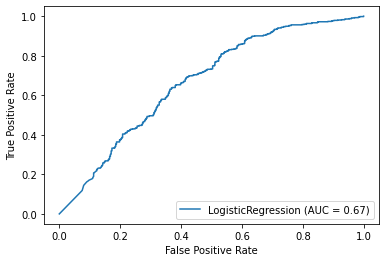

In [13]:
#plotting the ROC curve
plot_roc_curve(model,x_test, y_test)